In [2]:
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv")
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [4]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
X = df.iloc[:,:-1]
X.shape

(303, 13)

In [6]:
y = df['target']
y.shape

(303,)

nn architecture

In [7]:
from sklearn import metrics
model = tf.keras.models.Sequential()
norm = tf.keras.layers.Normalization()
norm.adapt(X)
model.add(norm)
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

es = tf.keras.callbacks.EarlyStopping(patience=10)
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy']
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18,460
Trainable params: 18,433
Non-trainable params: 27
_________________________________________________________________


In [8]:
history = model.fit(x=X,y=y, batch_size=8, epochs=100, callbacks=[es], validation_split=.2, verbose=True)

Epoch 1/100
31/31 [==============================] - 1s 6ms/step - loss: 0.4549 - accuracy: 0.8182 - val_loss: 0.8772 - val_accuracy: 0.4754
Epoch 2/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2972 - accuracy: 0.8926 - val_loss: 0.8209 - val_accuracy: 0.5902
Epoch 3/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.8926 - val_loss: 0.8619 - val_accuracy: 0.5738
Epoch 4/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2460 - accuracy: 0.9008 - val_loss: 0.8717 - val_accuracy: 0.5738
Epoch 5/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9050 - val_loss: 0.9480 - val_accuracy: 0.5738
Epoch 6/100
31/31 [==============================] - 0s 2ms/step - loss: 0.2144 - accuracy: 0.9091 - val_loss: 0.9336 - val_accuracy: 0.5574
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.1979 - accuracy: 0.9174 - val_loss: 0.7582 - val_accuracy: 0.6230
Epoch 8/100
3

In [9]:
df = pd.DataFrame(history.history)
df['epoch'] = history.epoch
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.454949,0.818182,0.877230,0.475410,0
1,0.297238,0.892562,0.820860,0.590164,1
2,0.267189,0.892562,0.861937,0.573770,2
3,0.245988,0.900826,0.871669,0.573770,3
4,0.229381,0.904959,0.948006,0.573770,4


In [10]:
import plotly.express as px


In [11]:
import matplotlib.pyplot as plt

<AxesSubplot:>

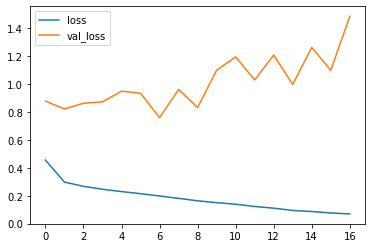

In [12]:
df[['loss', 'val_loss']].plot()

<AxesSubplot:>

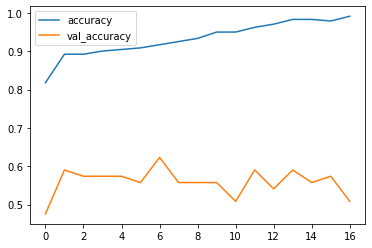

In [13]:
df[['accuracy','val_accuracy']].plot()

In [14]:
model.save("model_bekar_h")

INFO:tensorflow:Assets written to: model_bekar_h\assets
